# Market Basket Analysis using apriori algorithm

**Support** is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.

**Confidence** is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% of the cases where Diaper and Gum were purchased, the purchase also included Beer and Chips. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.

**Lift** is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

In [62]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#load data
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Clean up spaces in description and remove any rows that don't have a valid invoice
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [4]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [42]:
basket = (df
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
print(basket.shape)
basket.tail()

(20609, 4194)


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:

# Convert the units to 1 hot encoded values# Conve 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [29]:
basket_sets = basket.applymap(encode_units)


In [30]:
# No need to track postage
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [31]:
basket_sets.head()


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Build up the frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [44]:
frequent_itemsets.tail()


,support,itemsets
1732,0.011354,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
1733,0.013004,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
1734,0.010772,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SU..."
1735,0.010918,"(LUNCH BAG PINK POLKADOT, LUNCH BAG BLACK SKU..."
1736,0.010044,"(LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE,..."


In [50]:
# Create the rules# Create 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(len(rules))
rules.head()

2789


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JAM MAKING SET PRINTED),(6 RIBBONS RUSTIC CHARM),0.056383,0.046339,0.011451,0.203098,4.382878,0.008839,1.196711
1,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET PRINTED),0.046339,0.056383,0.011451,0.247120,4.382878,0.008839,1.253344
2,(JAM MAKING SET WITH JARS),(6 RIBBONS RUSTIC CHARM),0.054976,0.046339,0.010044,0.182701,3.942702,0.007497,1.166844
3,(6 RIBBONS RUSTIC CHARM),(JAM MAKING SET WITH JARS),0.046339,0.054976,0.010044,0.216754,3.942702,0.007497,1.206548
4,(JUMBO BAG RED RETROSPOT),(6 RIBBONS RUSTIC CHARM),0.101509,0.046339,0.010529,0.103728,2.238472,0.005826,1.064031


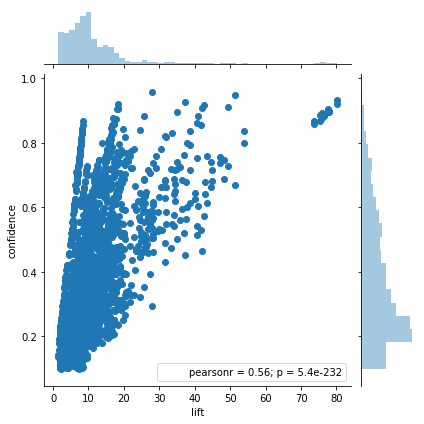

In [58]:
sns.jointplot(data = rules, y = 'confidence', x ='lift')

In [63]:
sns.relplot()

AttributeError: module 'seaborn' has no attribute 'relplot'